# Import + Define Section

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import os
import cv2
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa 

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers.experimental import RandomFourierFeatures
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.metrics import Precision, Recall

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/My Drive/Colab Notebooks/Thai Dessert Dataset Augmented/Train"
dataset_test_path = "/content/drive/My Drive/Colab Notebooks/Thai Dessert Dataset Augmented/Test"
saved_path = "/content/drive/My Drive/Colab Notebooks/Thai Dessert Saved Models/"

## Function Define

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Predict

## InceptionV3

### Not Tuning


In [ ]:
model_icpv3 = keras.models.load_model(saved_path+'model_inceptionv3_not_tuning_v1.h5', custom_objects={'f1_m':f1_m, 'precision_m':precision_m, 'recall_m':recall_m})

In [ ]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    dataset_test_path,
    target_size=(160, 160),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model_icpv3.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())  

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

Found 500 images belonging to 10 classes.
                         precision    recall  f1-score   support

          kanom_bua_loi       0.30      0.82      0.44        50
             kanom_chan       0.57      0.16      0.25        50
          kanom_dok_jok       0.47      0.40      0.43        50
          kanom_kai_tao       0.38      0.22      0.28        50
             kanom_krok       0.65      0.22      0.33        50
        kanom_phoi_tong       0.40      0.28      0.33        50
            kanom_salim       0.50      0.02      0.04        50
kanom_sangkhaya_faktong       0.19      0.46      0.27        50
         kanom_tong_yib       0.28      0.46      0.35        50
         kanom_tong_yod       0.39      0.14      0.21        50

               accuracy                           0.32       500
              macro avg       0.41      0.32      0.29       500
           weighted avg       0.41      0.32      0.29       500



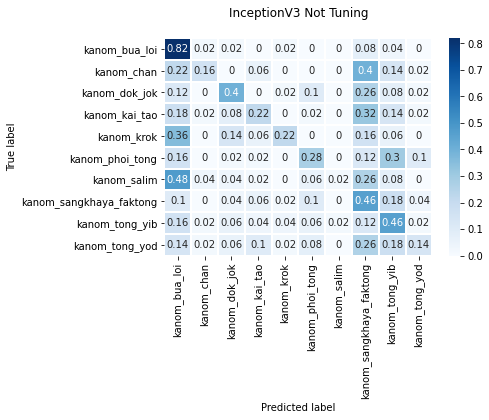

In [ ]:
cf_matrix = confusion_matrix(true_classes, predicted_classes, normalize='true')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', linewidths=1,xticklabels=class_labels,yticklabels=class_labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('InceptionV3 Not Tuning\n')
plt.show()


### Tuned

In [ ]:
model_icpv3 = keras.models.load_model(saved_path+'model_inceptionv3_tuned_v1.h5', custom_objects={'f1_m':f1_m, 'precision_m':precision_m, 'recall_m':recall_m})

In [ ]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    dataset_test_path,
    target_size=(160, 160),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model_icpv3.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())  

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

Found 500 images belonging to 10 classes.
                         precision    recall  f1-score   support

          kanom_bua_loi       0.46      0.44      0.45        50
             kanom_chan       0.40      0.40      0.40        50
          kanom_dok_jok       0.43      0.48      0.45        50
          kanom_kai_tao       0.33      0.34      0.34        50
             kanom_krok       0.36      0.46      0.40        50
        kanom_phoi_tong       0.38      0.40      0.39        50
            kanom_salim       0.43      0.40      0.41        50
kanom_sangkhaya_faktong       0.17      0.16      0.16        50
         kanom_tong_yib       0.39      0.32      0.35        50
         kanom_tong_yod       0.34      0.30      0.32        50

               accuracy                           0.37       500
              macro avg       0.37      0.37      0.37       500
           weighted avg       0.37      0.37      0.37       500



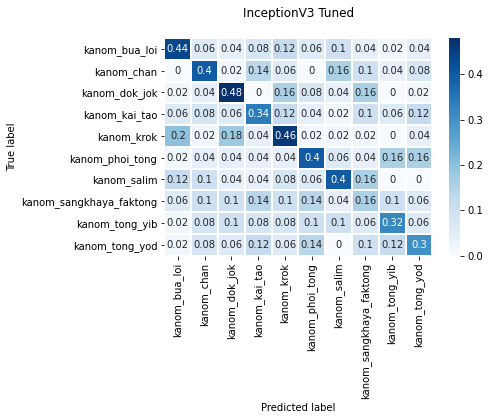

In [ ]:
cf_matrix = confusion_matrix(true_classes, predicted_classes, normalize='true')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', linewidths=1,xticklabels=class_labels,yticklabels=class_labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('InceptionV3 Tuned\n')
plt.show()


## MobileNetV2

### Not Tuning

In [ ]:
model_mbnv2_no = keras.models.load_model(saved_path+'model_mobilenetv2_not_tuning_v1.h5', custom_objects={'f1_m':f1_m, 'precision_m':precision_m, 'recall_m':recall_m})

In [ ]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    dataset_test_path,
    target_size=(160, 160),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model_mbnv2_no.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())  

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

Found 500 images belonging to 10 classes.
                         precision    recall  f1-score   support

          kanom_bua_loi       0.80      0.72      0.76        50
             kanom_chan       0.71      0.70      0.71        50
          kanom_dok_jok       0.83      0.60      0.70        50
          kanom_kai_tao       0.73      0.54      0.62        50
             kanom_krok       0.67      0.68      0.67        50
        kanom_phoi_tong       0.50      0.82      0.62        50
            kanom_salim       0.53      0.68      0.60        50
kanom_sangkhaya_faktong       0.68      0.54      0.60        50
         kanom_tong_yib       0.50      0.46      0.48        50
         kanom_tong_yod       0.60      0.60      0.60        50

               accuracy                           0.63       500
              macro avg       0.66      0.63      0.64       500
           weighted avg       0.66      0.63      0.64       500



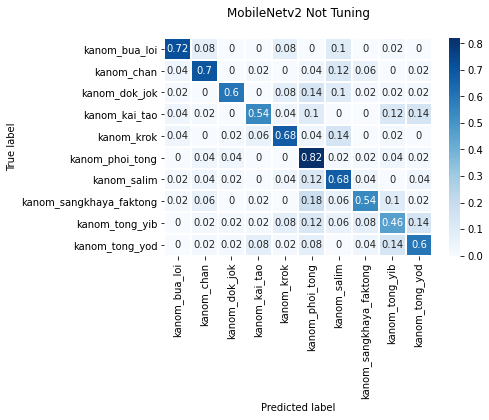

In [ ]:
cf_matrix = confusion_matrix(true_classes, predicted_classes, normalize='true')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', linewidths=1,xticklabels=class_labels,yticklabels=class_labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('MobileNetv2 Not Tuning\n')
plt.show()

### Tuned

In [ ]:
model_mbnv2 = keras.models.load_model(saved_path+'model_moblienet_tuned_v1.h5', custom_objects={'f1_m':f1_m, 'precision_m':precision_m, 'recall_m':recall_m})

In [ ]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    dataset_test_path,
    target_size=(160, 160),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model_mbnv2.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())  

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

Found 500 images belonging to 10 classes.
                         precision    recall  f1-score   support

          kanom_bua_loi       0.77      0.82      0.80        50
             kanom_chan       0.73      0.72      0.73        50
          kanom_dok_jok       0.89      0.62      0.73        50
          kanom_kai_tao       0.77      0.60      0.67        50
             kanom_krok       0.66      0.66      0.66        50
        kanom_phoi_tong       0.51      0.86      0.64        50
            kanom_salim       0.61      0.76      0.68        50
kanom_sangkhaya_faktong       0.70      0.56      0.62        50
         kanom_tong_yib       0.53      0.46      0.49        50
         kanom_tong_yod       0.70      0.62      0.66        50

               accuracy                           0.67       500
              macro avg       0.69      0.67      0.67       500
           weighted avg       0.69      0.67      0.67       500



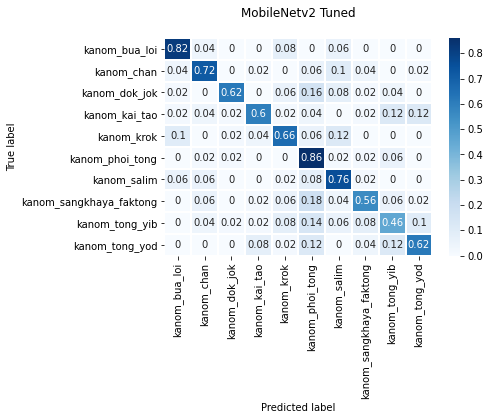

In [ ]:
cf_matrix = confusion_matrix(true_classes, predicted_classes, normalize='true')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', linewidths=1,xticklabels=class_labels,yticklabels=class_labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('MobileNetv2 Tuned\n')
plt.show()

## Xception

### Not Tuning

In [ ]:
model_xcp = keras.models.load_model(saved_path+'model_xception_not_tuning_v3.h5', custom_objects={'f1_m':f1_m, 'precision_m':precision_m, 'recall_m':recall_m})

In [ ]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    dataset_test_path,
    target_size=(160, 160),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model_xcp.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())  

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

Found 500 images belonging to 10 classes.
                         precision    recall  f1-score   support

          kanom_bua_loi       0.57      0.72      0.64        50
             kanom_chan       0.46      0.70      0.56        50
          kanom_dok_jok       0.55      0.74      0.63        50
          kanom_kai_tao       0.55      0.46      0.50        50
             kanom_krok       0.60      0.58      0.59        50
        kanom_phoi_tong       0.46      0.60      0.52        50
            kanom_salim       0.64      0.36      0.46        50
kanom_sangkhaya_faktong       0.46      0.46      0.46        50
         kanom_tong_yib       0.62      0.30      0.41        50
         kanom_tong_yod       0.57      0.42      0.48        50

               accuracy                           0.53       500
              macro avg       0.55      0.53      0.52       500
           weighted avg       0.55      0.53      0.52       500



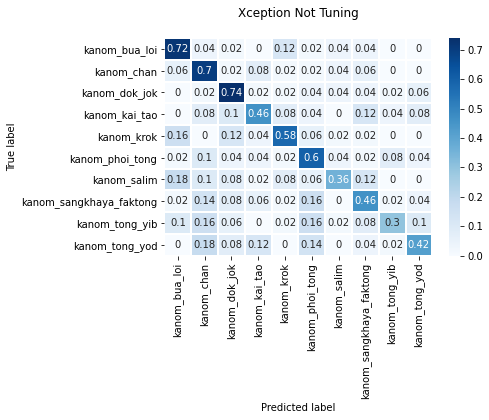

In [ ]:
cf_matrix = confusion_matrix(true_classes, predicted_classes, normalize='true')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', linewidths=1,xticklabels=class_labels,yticklabels=class_labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Xception Not Tuning\n')
plt.show()

### Tuned

In [ ]:
model_xcp = keras.models.load_model(saved_path+'model_xception_tuned_v3.h5', custom_objects={'f1_m':f1_m, 'precision_m':precision_m, 'recall_m':recall_m})

In [ ]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    dataset_test_path,
    target_size=(160, 160),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model_xcp.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())  

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

Found 500 images belonging to 10 classes.
                         precision    recall  f1-score   support

          kanom_bua_loi       0.44      0.78      0.56        50
             kanom_chan       0.48      0.28      0.35        50
          kanom_dok_jok       0.45      0.56      0.50        50
          kanom_kai_tao       0.34      0.54      0.42        50
             kanom_krok       0.56      0.48      0.52        50
        kanom_phoi_tong       0.37      0.52      0.43        50
            kanom_salim       0.50      0.28      0.36        50
kanom_sangkhaya_faktong       0.34      0.26      0.30        50
         kanom_tong_yib       0.36      0.08      0.13        50
         kanom_tong_yod       0.39      0.38      0.38        50

               accuracy                           0.42       500
              macro avg       0.42      0.42      0.39       500
           weighted avg       0.42      0.42      0.39       500



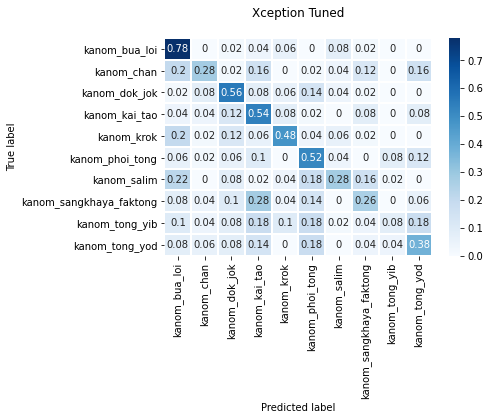

In [ ]:
cf_matrix = confusion_matrix(true_classes, predicted_classes, normalize='true')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', linewidths=1,xticklabels=class_labels,yticklabels=class_labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Xception Tuned\n')
plt.show()